In this script, I will need pandas, numpy and matplotlib to process and visualize my data, and sklearn to apply linear regression. 

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

I will now open the csv file generated by the previous script and reset the index.

In [2]:
df = pd.read_csv('pre-processed_norm_neurite_area_t.csv')
df

,day,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,23.259605,25.172361,16.183540,15.951911,26.425322,31.945208,22.101134,19.573885,26.923307,...,20.344153,20.022406,14.027131,19.061872,16.285719,9.180936,6.999435,16.144800,19.405604,12.078511
2,1.0,43.829276,48.588928,41.816356,39.783333,50.552342,52.744978,46.579577,51.597085,50.216604,...,50.842215,61.428525,61.762117,54.241024,51.439412,31.484875,39.583718,53.607502,46.342263,38.178412
3,1.5,89.513080,113.504058,120.012585,96.720919,106.649467,119.250504,113.050174,105.939387,117.839765,...,71.043828,79.846670,71.158870,72.682177,72.965812,46.845340,51.843671,56.144880,65.948483,52.423318
4,2.0,120.575571,136.418969,116.961828,124.493704,140.519365,143.638007,127.575269,132.702816,157.699905,...,78.995348,89.317977,70.057941,74.174348,104.432747,64.473172,59.715482,58.993036,71.110361,65.350047
5,2.5,150.511480,199.779863,161.083200,154.889778,178.917158,186.796774,198.042880,170.469855,219.856182,...,78.525803,93.216793,69.669378,73.211164,107.833858,57.478044,52.640188,73.237754,84.608942,70.270285
6,3.0,274.688650,295.116821,247.679504,266.167378,288.531401,269.651464,343.105737,263.011284,322.148130,...,83.844517,122.162898,59.786921,106.580142,122.996030,112.297231,78.440941,75.035554,100.772848,96.587971


In [3]:
df = df.set_index('day')
df

,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,wt_9,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
day,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,23.259605,25.172361,16.183540,15.951911,26.425322,31.945208,22.101134,19.573885,26.923307,23.202951,...,20.344153,20.022406,14.027131,19.061872,16.285719,9.180936,6.999435,16.144800,19.405604,12.078511
1.0,43.829276,48.588928,41.816356,39.783333,50.552342,52.744978,46.579577,51.597085,50.216604,42.020420,...,50.842215,61.428525,61.762117,54.241024,51.439412,31.484875,39.583718,53.607502,46.342263,38.178412
1.5,89.513080,113.504058,120.012585,96.720919,106.649467,119.250504,113.050174,105.939387,117.839765,108.933140,...,71.043828,79.846670,71.158870,72.682177,72.965812,46.845340,51.843671,56.144880,65.948483,52.423318
2.0,120.575571,136.418969,116.961828,124.493704,140.519365,143.638007,127.575269,132.702816,157.699905,142.993143,...,78.995348,89.317977,70.057941,74.174348,104.432747,64.473172,59.715482,58.993036,71.110361,65.350047
2.5,150.511480,199.779863,161.083200,154.889778,178.917158,186.796774,198.042880,170.469855,219.856182,202.564021,...,78.525803,93.216793,69.669378,73.211164,107.833858,57.478044,52.640188,73.237754,84.608942,70.270285
3.0,274.688650,295.116821,247.679504,266.167378,288.531401,269.651464,343.105737,263.011284,322.148130,291.007407,...,83.844517,122.162898,59.786921,106.580142,122.996030,112.297231,78.440941,75.035554,100.772848,96.587971


As shown in the previous script, it seems like I can fit a straight line on the rise of neurite area over time. Therefore, I will create a linear regression model for each sample and get the coefficient (just one as they were normalised to start from 0). This will be a measure of growth rate. 

In [12]:
def get_coef(ts, col):
    model = LinearRegression().fit(ts.to_numpy().reshape(-1, 1), col)
    coef = model.coef_
    return coef
df_coef = df.apply(lambda c: get_coef(df.index, c))
df_coef

,wt_7,wt_8,wt_13,wt_18,wt_15,wt_14,wt_22,wt_19,wt_24,wt_9,...,oe_18,oe_8,oe_25,oe_15,oe_19,oe_24,oe_3,oe_7,oe_20,oe_10
0,82.522571,94.456822,79.141665,82.934874,90.038921,86.396468,104.4426,83.709395,104.27096,95.194078,...,28.289285,38.626209,21.352934,31.998024,43.219836,33.319586,24.766864,24.619865,32.678094,30.951364


I will now reshape df_coef to make it more clear and to be able to plot it more easily. I will then create a scatter plot to show the distribution of the coefficients.

In [13]:
df_coef = df_coef.T
df_coef = df_coef.rename(columns={0 : 'coef'})
df_coef = df_coef.reset_index(level=0)
df_coef = df_coef.rename(columns={'index' : 'sample'})
df_coef

,sample,coef
0,wt_7,82.522571
1,wt_8,94.456822
2,wt_13,79.141665
3,wt_18,82.934874
4,wt_15,90.038921
5,wt_14,86.396468
6,wt_22,104.442600
7,wt_19,83.709395
8,wt_24,104.270960
9,wt_9,95.194078


<AxesSubplot:xlabel='sample', ylabel='coef'>

<Figure size 432x288 with 0 Axes>

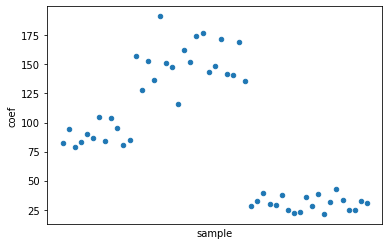

In [28]:
plt.figure()
df_coef.plot.scatter('sample', 'coef', xticks= [])